In [1]:
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib as mpl

#使用中文字体
mpl.rcParams['font.family']=['Microsoft Yahei','sans-serif']
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [27]:
#导入数据
df = pd.read_csv("students.csv")
df.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


In [28]:
# 只保留sprint和smoking列
df1=df[["Sprint","Smoking"]]
df1.groupby("Smoking").count()

,Sprint
Smoking,
,24
0,304
1,37
2,70


In [34]:
#去除smoking和Sprint为缺失值的数据
df1=df1[(df1["Smoking"]!=' ') & (df1["Sprint"]!=' ')]

df1.groupby("Smoking").count()

,Sprint
Smoking,
0,261
1,33
2,59


In [35]:
#将Sprint列转换为数值型
df1["Smoking"]=df1["Smoking"].astype(int)
df1["Sprint"]=df1["Sprint"].astype(float)

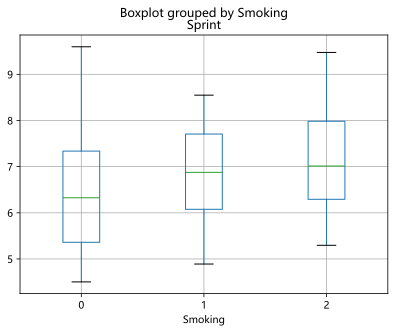

In [36]:
#绘制箱型图
df1.boxplot("Sprint","Smoking")
plt.show()

In [43]:
#使用statsmodels的anova_oneway函数进行ANOVA分析
import statsmodels.api as sm

sm.stats.anova_oneway(df1["Sprint"],df1["Smoking"], use_var="equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = np.float64(9.208599845380864)
pvalue = np.float64(0.00012659768158160005)
df = (2.0, np.float64(350.0))
df_num = 2.0
df_denom = np.float64(350.0)
nobs_t = np.float64(353.0)
n_groups = 3
means = array([6.41148659, 6.83533333, 7.12091525])
nobs = array([261.,  33.,  59.])
vars_ = array([1.56696177, 1.0494261 , 1.17397208])
use_var = 'equal'
welch_correction = True
tuple = (np.float64(9.208599845380864), np.float64(0.00012659768158160005))

In [37]:
#将数据按照分类拆分
s0 = df1[df1["Smoking"]==0]["Sprint"]
s1 = df1[df1["Smoking"]==1]["Sprint"]
s2 = df1[df1["Smoking"]==2]["Sprint"]

In [38]:
#验证数据拆分正确
print(len(s0),len(s1),len(s2))

261 33 59


In [39]:
#使用F检验进行ANOVA分析
stats.f_oneway(s0,s1,s2)

F_onewayResult(statistic=np.float64(9.208599845380919), pvalue=np.float64(0.00012659768158159465))

In [40]:
#回归分析
from statsmodels.formula.api import ols

model = ols("Sprint ~ C(Smoking)", data=df1)
lm = model.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Sprint   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     9.209
Date:                Mon, 05 May 2025   Prob (F-statistic):           0.000127
Time:                        10:31:30   Log-Likelihood:                -565.51
No. Observations:                 353   AIC:                             1137.
Df Residuals:                     350   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4115      0.075     85.885      0.000       6.265       6.558
C(Smoking)[T.1]     0.4238      0.223      1.902      0.058      -0.014       0.862
C(Smoking)[T.2]     0.7094      0.174      4.081      0.000       0.367       1.051
==============================================================================
Omnibus:                       30.049   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.952
Skew:                           0.320   Prob(JB):                     0.000567
Kurtosis:                       2.220   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""